### Clustering con DBSCAN

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

#### Armando el algoritmo
Al igual que en la clase de kmeans, en primer lugar vamos a armar el algoritmo de DBSCAN en su forma más sencilla prar interiorizarnos en su funcionamiento. Vamos a hacer la primera parte y el resto de la implementación queda de tarea.

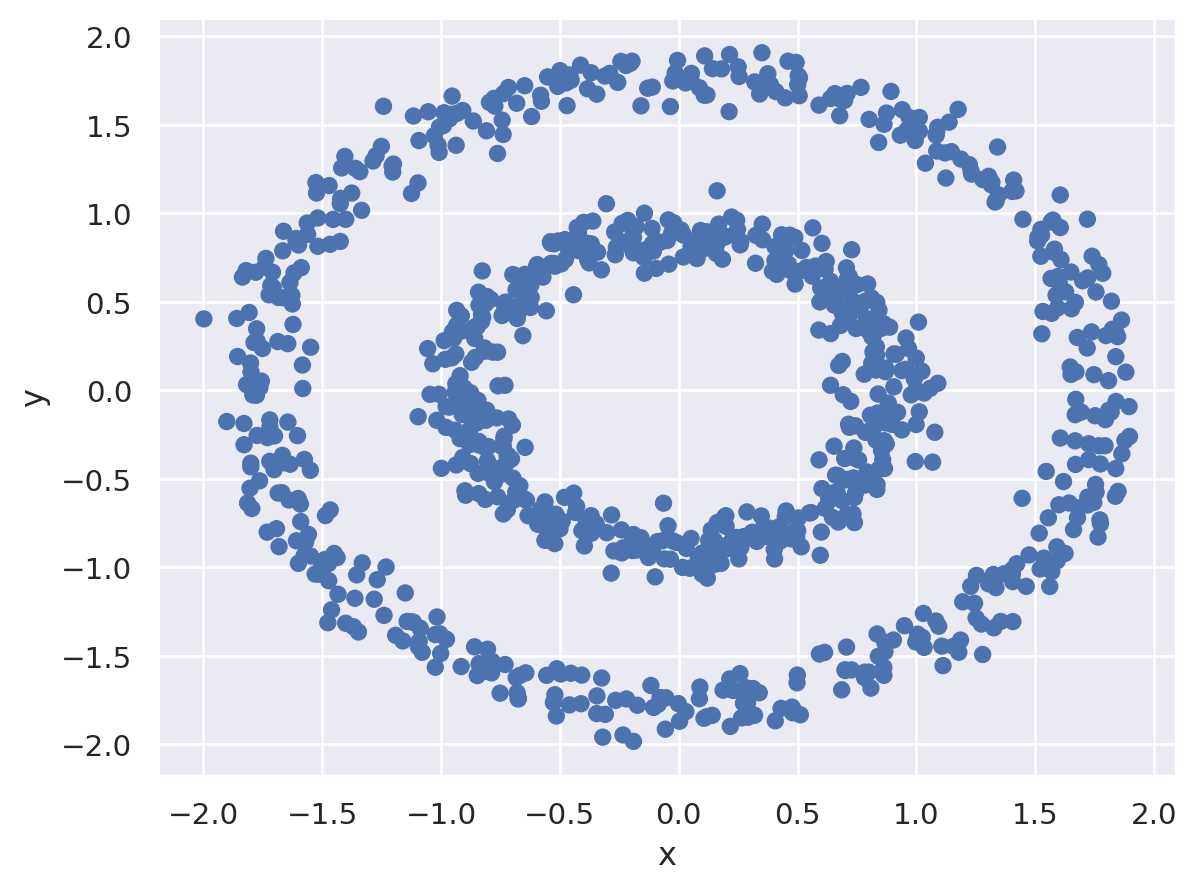

In [2]:
# Creamos nuestros datos de juego
X, labels_true = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state = 42)
X = StandardScaler().fit_transform(X)

datos = pd.DataFrame(X)
datos.columns = ["x", "y"]

# Graficamos
(
    so.Plot(data = datos, x = "x", y = "y")
    .add(so.Dot())
)

¿Qué pasa si usamos kmeans acá?

In [ ]:
# Item 2
kmeans = KMeans(n_clusters=6)
# Asignamos cada observación a un cluster
cluster = kmeans.fit_predict(datos[["x", "y"]])


(
    so.Plot(data = datos, x = "x", y = "y", color = cluster.astype("str"))
    .add(so.Dot())
)

¿Por qué creen que no funcionó? ¿Por qué funcionaría con DBSCAN?

#### **Ejercicio 1**

1. Implementar una función que dado un conjunto de puntos (en un DataFrame), el índice de uno de los puntos y un radio eps, nos devuelva los índices de los puntos vecinos.
2. Aplicar la función a los ejemplo para calcular los vecinos del punto 999.
3. Graficar todos los puntos, pintando de un color distinto los puntos hallados en el punto 2.



##### Tip: guardar los puntos en un *set*

Como se muestra a continuación, un set en Python es una estructura de datos usada para almacenar elementos de una manera similar a las listas. Lo interesante es que resulta muy facil agregar nuevos elementos al set.

Tenemos un set llamado A, con ciertos elementos:

In [ ]:
A = {1, 2, 3, 5, 1, 4}
A

Utilizando update(), podemos agregarle nuevos elementos

In [ ]:
A.update({2,3,100})
A

##### Volviendo, vamos a resolver el ejercicio 1.

In [3]:
# Pintamos el punto 999
ind = 999
etiquetas = np.zeros(len(datos))
etiquetas[ind] = 1

(
    so.Plot(data = datos, x = "x", y = "y", color = etiquetas.astype("str"))
    .add(so.Dot())
)

NameError: name 'np' is not defined

Armamos la función para obtener vecinos

In [ ]:
"""
Implementar una función que dado un conjunto de puntos (en un DataFrame), el índice de uno de los puntos y un radio eps, nos devuelva los índices de los puntos vecinos.
Aplicar la función a los ejemplo para calcular los vecinos del punto 999.
Graficar todos los puntos, pintando de un color distinto los puntos hallados en el punto 2
"""
def obtener_vecinos(datos, ind_punto, eps):
    punto = datos.iloc[ind_punto] # Selecciono el punto central
    dist = np.linalg.norm(datos - punto, axis=1) # Calculo distancias
    vecinos = set(np.where(dist < eps)[0]) # Armo un set con los vecinos
    return vecinos


In [4]:
cjto = obtener_vecinos(datos, ind, 0.1)
print(cjto)

NameError: name 'obtener_vecinos' is not defined

¿Y cómo lo graficamos?

In [ ]:
# Graficamos
etiquetas = np.zeros(len(datos))
etiquetas[list(cjto)]= 1

(
    so.Plot(data = datos, x = "x", y = "y", color = etiquetas.astype("str"))
    .add(so.Dot())
)

**Ejercicio 2**

1. Implementar una función que dado un conjunto de puntos (en un DataFrame), un vector de etiquetas correspondientes a clusters y la etiqueta correspondeinte a algún cluster, el valor de eps y el valor de minPts, agregue al cluster todos los puntos directamente alcanzables desde algún punto central del cluster.
2. Aplicar la función al ejemplo del ejercicio anterior.
3. Graficar todos los puntos, pintando de un color distinto los puntos hallados en el punto 2.

Repetir los puntos 2 y 3 un par de veces y observar como crece el cluster. Qué faltaría para poder encontrar el cluster completo?

In [ ]:
datos[etiquetas == 1].index

In [ ]:
def extender_cluster(datos, etiquetas, cluster, eps, minPts):
    indices_puntos = datos[etiquetas == cluster].index
    for indice in indices_puntos:
        vecinos = obtener_vecinos(datos, indice, eps)
        if len(vecinos) >= minPts:
            etiquetas[list(vecinos)] = cluster
    return(etiquetas)

In [ ]:
# Pintamos el punto 999
ind = 999
etiquetas = np.zeros(len(datos))
etiquetas[ind] = 1

eps = 0.3
minPts = 5

etiquetas = extender_cluster(datos, etiquetas, etiquetas[ind], eps, minPts)
etiquetas = extender_cluster(datos, etiquetas, etiquetas[ind], eps, minPts)
etiquetas = extender_cluster(datos, etiquetas, etiquetas[ind], eps, minPts)

(
    so.Plot(datos, x = "x", y = "y", color = etiquetas.astype("str"))
    .add(so.Dot())
    .layout(size=(4, 4))
)

**Ejercicio 3**
1. Realizar mediante un for 20 iteraciones del procedimiento anterior y graficar el cluster resultante.
2. Si la cantidad de iteraciones no alcanzó para calcular todo el cluster aumentar la cantidad de iteraciones.
3. Identificar algún punto que no esté en el cluster encontrado, calcular el cluster correspondiente y graficar.

In [5]:
eps = 0.2
minPts = 5
ind = 323
etiquetas = np.zeros(len(datos))
etiquetas[ind] = 1

for i in range(20):
    etiquetas = extender_cluster(datos, etiquetas, etiquetas[ind], eps, minPts)
(
so.Plot(datos, x = "x", y = "y", color = etiquetas.astype("str"))
.add(so.Dot())
)

NameError: name 'np' is not defined

¿Y si queremos explorar otro cluster?

In [ ]:
??????

## Trabajando con el comando DBSCAN del paquete sklearn.cluster


In [ ]:
# Elegimos eps mas chico que la distancia que vemos entre clusters.
# Elegimos min_samples según la densidad de puntos (¿cuántos puntos tienen a distancia menor que eps los puntos del cluster?)
clustering = DBSCAN(eps=0.193990129715, min_samples=10) # eps=0.193990129715 es el minimo del conjunto de epsilons que clasifica 2 clusters sin outliers
etiqueta = clustering.fit_predict(datos)

# Graficamos
(
    so.Plot(data = datos, x = "x", y = "y", color = etiqueta.astype("str"))
    .add(so.Dot())
)

Vamos con otro conjunto de datos

In [ ]:
# Tomamos nubes aleatorias y graficamos los puntos.
X, v = make_blobs(n_samples=60, centers=4, cluster_std=0.60, random_state=0)
datos = pd.DataFrame(X)
datos.columns = ["x", "y"]
datos.head()

In [6]:
# El método Text nos permite incorporar texto a los nodos, es otro canal que podemos usar para codificar información.
# Podemos usarla para el número de nodo o para identificar el cluster.
(
    so.Plot(x = X[:,0], y = X[:,1], text = datos.index)
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .limit(x=(-5, 6), y=(-1, 10))
    .layout(size=(6, 6))  # Conviene graficar en un cuadrado para ver correctamente las distancias
)

NameError: name 'so' is not defined

In [1]:
# Elegimos eps mas chico que la distancia que vemos entre clusters.
# Elegimos min_samples según la densidad de puntos (¿cuántos puntos tienen a distancia menor que eps los puntos del cluster?)
clustering = DBSCAN(eps=1, min_samples=8)
etiqueta = clustering.fit_predict(X)
print(etiqueta)

NameError: name 'DBSCAN' is not defined

In [ ]:
# Graficamos
(
    so.Plot(x = X[:,0], y = X[:,1], color = etiqueta.astype("str"), text = v.astype("str"))
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    #.layout(size=(4, 4))
)

En el último gráfico, ¿cuáles puntos fueron marcados como outliers?

Fuera de los outliers, ¿quedó algún punto marcado incorrectamente?

# **Ejemplo Práctico:** detección de centros de actividad urbana
Fuente: https://bitsandbricks.github.io/post/dbscan-machine-learning-para-detectar-centros-de-actividad-urbana/

La S del nombre DBSCAN se refiere a "SPATIAL", este algoritmo es especialmente útil para detectar clusters en información espacial o en el plano, por ejemplo barrios, comunidades, focos de tormentas, etc.

Vamos a utilizarlo para detectar focos gastronómicos en la ciudad de Mendoza (más particularmente, bares).

Mirando los datos, qué variables utilizarían? Cómo traducirían nuestro problema a los ditintos párametros que puede tomar DBSCAN?

**eps:** a que distancia esperamos que esten los bares cercanos

**minPts:** cuantos bares esperamos que tenga cerca un bar para considerarlo una zona de bares

In [ ]:
# Cargamos los datos
df = pd.read_csv('https://bitsandbricks.github.io/data/mendoza_poi.csv')
df.head()

1. Quedarnos solo con los bares del dataset
2. Aplicar DBSCAN a partir de parámetros propios
3. Implementar alguna forma de elegir los parámetros

In [7]:
# Nos quedamos con los bares del dataset
datosBares = df[(df['categoria'] == 'gastronomia') & (df['tipo'] == 'bar')]
datosBares_pos = datosBares[['lat', 'lng']]

# Aplicamos DBSCAN
clustering = DBSCAN(eps=0.2, min_samples=8)
etiquetas = clustering.fit_predict(datosBares_pos)

# Graficamos
(
    so.Plot(data = datosBares, x = "lat", y = "lng", color = etiqueta.astype("str"))
    .add(so.Dot())
)

NameError: name 'df' is not defined

# Selección del hiperparámetro eps

Los valores eps y minPts son hiperparámetros, no se pueden aprender de los datos, pero algunas técnicas nos pueden ayudar.


In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(datosBares_pos)

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
clustering = DBSCAN(eps=0.005, min_samples=10)
etiqueta = clustering.fit_predict(datosBares[["lat", "lng"]])
datosBares["cluster"] = etiqueta.astype(str)  # Convert to string for coloring

# Create interactive map with Plotly
fig = px.scatter_mapbox(
    datosBares,
    lat="lat",
    lon="lng",
    color="cluster",
    zoom=12,
    mapbox_style="carto-positron",
    title="DBSCAN Clustering of Bares"
)
fig.update_layout(width=900, height=900)

fig.show()
